In [2]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import json
from get_utils import get_data, get_dir
import plot as plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np



#%matplotlib widget
#%matplotlib qt
#%matplotlib inline

# Directory info
This is the format that I use for generating directory when I train models. I use the network size of 128 for all analysis.

In [3]:
folder_name = 'Sim_fixed_128'
n_hidden = 128
n_model = 40 # number of simulated networks

# General things

You can specify a saving directory, basically the directory in which the figure can be saved.
The base directory is **hard-coded** in the current version of the code.

In [4]:
phases = {'NF1':[0],'FF1':[8],'NF2':[0],'FF2':[8]}
palette_colors = {'FF1':(0,0.5,0),'FF2':(0.4,0.4,0.8),'NF1':(0,0,0),'NF2':(0,0,0)}


fontsize_label = 7
fontsize_tick = 7
fontsize_legend = 7

base_dir = os.path.join(os.path.expanduser('~'),'Documents','Data','MotorNet')
save_fig = '/Users/mahdiyar/Dropbox (Personal)/MotorSavings/paper/figures_raw'
if not os.path.exists(save_fig):
    save_fig = os.getcwd()  # Set current directory as save_dir if save_dir doesn't exist

# Simple test

you can plot the test for one network just to get a sense how different aspect of loss function change over time for single network

In [5]:
# _,_,loss_file = get_dir(folder_name, 'model01','FF2', ff_coef=8)
# # load all losses
# log = json.load(open(loss_file,'r'))

# for loss in log.keys():
#     fig,ax = plot.plot_training_log(log=log,loss_type=loss, w=10)
#     ax.set_title(f"{loss} (w={1})")
# #fig.savefig(os.path.join(data_dir,'loss_FF1.png'),dpi=300)

# Plot trajectories

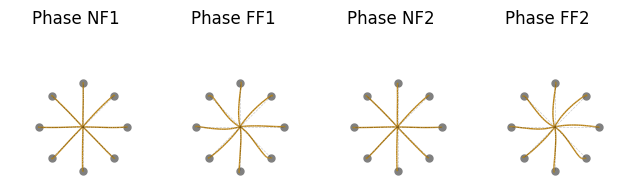

In [6]:
# Get data
ff_coef = None#[8,8,8,8]
data = get_data(folder_name,'model01',phases,ff_coef,is_channel=False,n_hidden=n_hidden)



# PLOT
n_phase = len(phases)
fig,ax = plt.subplots(1,n_phase,figsize=(5/3*n_phase,2.5))

colors = ['navy']
cmap = ListedColormap(colors,'regions',N=1)

colors = [[184/255, 130/255, 23/255, 1]]  # Single color: red
cmap = ListedColormap(colors,'regions',N=1)

if len(phases) == 1:
    ax = [ax]
for i,p in enumerate(phases.keys()):
    plot.plot_simulations(ax[i],xy=data[i]['xy'],target_xy=data[i]['tg'],vel=None,plot_lat=False,cmap=cmap,s=25)
    ax[i].set_title(f'Phase {p}')

    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)

    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(left = False,bottom = False) 
    ax[i].set_xlabel('', fontsize = fontsize_label)
    ax[i].set_ylabel('', fontsize = fontsize_label)

    # Get all axes in the figure
    all_axes = fig.get_axes()

    # Identify and remove the colorbar axes
    # (assuming the colorbar axes is the last one in the list)
    if len(all_axes) > len(ax):  # More axes present than your main plots
        colorbar_ax = all_axes[-1]  # Assuming the colorbar is the last axes object
        colorbar_ax.remove()

plt.tight_layout()
plt.show()
#fig.savefig(os.path.join(save_fig,'traj_FF_on.pdf'),dpi=300,bbox_inches='tight')

# plot force

# plot kinematics

Including position and velocity over time

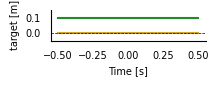

In [7]:
colors = np.ones((2,4))
colors[0,:3] = (34/255,139/255,34/255)
colors[1,:3] = (218/255,165/255,32/255)


i = 0
vel = np.array(data[0]['vel'][i])
goal = np.array(data[0]['tg'][i])
xy = np.array(data[0]['xy'][i])

n_time = np.shape(xy)[0]


start = goal[0]
target = goal[-1]

goal = np.array(data[0]['tg'][i])-start
xy = np.array(data[0]['xy'][i])-start

target = target - start
start = start - start


start = np.tile(start, (n_time,1))
target = np.tile(target, (n_time,1))


go_index = np.where(np.diff(goal,axis=0)!=0)[0][0]
go_cue = np.ones((goal.shape[0],1))
go_cue[:go_index] = 0

# plot input - start, target, go cue
fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(2,0.4))


dt = 0.01

x = np.linspace(0,np.shape(xy)[0]*dt,np.shape(xy)[0])-0.5

#ax.plot(x,start[:,0],color=colors[0],label='x')
#ax.plot(x,start[:,1],color=colors[1],label='y')

ax.plot(x,target[:,0],color=colors[0],label='x')
ax.plot(x,target[:,1],color=colors[1],label='y')


ax.axhline(y=0, color='k', linestyle='--',linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([-0.05,0.15])
ax.tick_params(left = False,bottom = False) 
ax.set_xlabel('Time [s]', fontsize = fontsize_label)
ax.set_ylabel('target [m]', fontsize = fontsize_label)
ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

#ax.legend(fontsize=fontsize_legend,loc='lower right',frameon = False)
fg.savefig(os.path.join(save_fig,'target.pdf'),dpi=300,bbox_inches='tight')

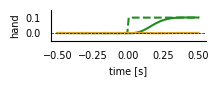

In [8]:
# plot input - start, target, go cue
fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(2.,0.4))


dt = 0.01

x = np.linspace(0,np.shape(xy)[0]*dt,np.shape(xy)[0])-0.5



ax.plot(x,goal[:,0],color=colors[0],label='x',linestyle='--')
ax.plot(x,goal[:,1],color=colors[1],label='y',linestyle='--')

ax.plot(x,xy[:,0],color=colors[0],label='x',linestyle='-')
ax.plot(x,xy[:,1],color=colors[1],label='y',linestyle='-')

ax.axhline(y=0, color='k', linestyle='--',linewidth=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim([-0.05,0.15])
ax.tick_params(left = False,bottom = False) 
ax.set_xlabel('time [s]', fontsize = fontsize_label)
ax.set_ylabel('hand', fontsize = fontsize_label)
ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

#ax.legend(fontsize=fontsize_legend,loc='lower right',frameon = False)
fg.savefig(os.path.join(save_fig,'xy.pdf'),dpi=300,bbox_inches='tight')

In [9]:
go_index

49

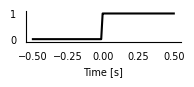

In [10]:
fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(2,0.4))

x = np.linspace(0,np.shape(xy)[0]*dt,np.shape(xy)[0])-0.5
ax.plot(x,go_cue,color='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left = False,bottom = False) 
ax.set_xlabel('Time [s]', fontsize = fontsize_label)
#ax.set_ylabel('Go cue [cm]', fontsize = fontsize_label)
ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)
ax.set_ylim([-0.1,1.1])

#ax.legend(fontsize=fontsize_legend,loc='lower right',frameon = False)
fg.savefig(os.path.join(save_fig,'go_cue.pdf'),dpi=300,bbox_inches='tight')

In [11]:
np.where(np.diff(goal,axis=0)>0)[0]

array([49, 49])

# Plot hidden activity and muscle force

In [12]:
data[0].keys()

dict_keys(['xy', 'tg', 'vel', 'all_action', 'all_hidden', 'all_muscle', 'all_force', 'endpoint_load', 'endpoint_force'])

In [20]:
i=1
target = 0
hidden = np.array(data[0]['all_hidden'][target,:,:])
muscle = np.array(data[0]['all_action'][target,:,:])

endpoint_force = np.array(data[0]['endpoint_force'][target,:,:])
endpoint_force.shape

(100, 2)

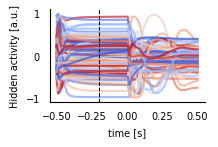

In [29]:
hidden = np.array(data[0]['all_hidden'][target,:,:])

fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(2.,1.2))
#ax = plot.plot_activation(ax, hidden,muscle)


dt = 0.01
x = np.linspace(0, np.shape(hidden)[0]*dt, np.shape(hidden)[0])-0.5

colors = plt.cm.coolwarm(np.linspace(0, 1, hidden.shape[1]))
np.random.shuffle(colors)

for i in range(hidden.shape[1]):
    ax.plot(x,hidden[:,i],color=colors[i],alpha=0.75)

ax.axvline(-0.2, color='k', linestyle='--',linewidth=0.75)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left = False,bottom = False) 
ax.set_xlabel('time [s]', fontsize = fontsize_label)
ax.set_ylabel('Hidden activity [a.u.]', fontsize = fontsize_label)
ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

fg.savefig(os.path.join(save_fig,'hidden.pdf'),dpi=300,bbox_inches='tight')

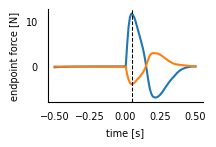

In [33]:
hidden = np.array(data[0]['all_hidden'][target,:,:])

fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(2.,1.2))
#ax = plot.plot_activation(ax, hidden,muscle)


dt = 0.01
x = np.linspace(0, np.shape(hidden)[0]*dt, np.shape(hidden)[0])-0.5

#colors = plt.cm.coolwarm(np.linspace(0, 1, hidden.shape[1]))
#np.random.shuffle(colors)

for i in range(endpoint_force.shape[1]):
    ax.plot(x,endpoint_force[:,i]) # ,color=colors[i],alpha=0.75

ax.axvline(0.05, color='k', linestyle='--',linewidth=0.75)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left = False,bottom = False) 
ax.set_xlabel('time [s]', fontsize = fontsize_label)
ax.set_ylabel('endpoint force [N]', fontsize = fontsize_label)
ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

fg.savefig(os.path.join(save_fig,'ep_force.pdf'),dpi=300,bbox_inches='tight')

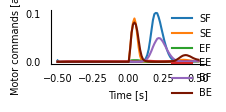

In [74]:
fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(2.,0.7))
#ax = plot.plot_activation(ax, hidden,muscle)


dt = 0.01
x = np.linspace(0, np.shape(muscle)[0]*dt, np.shape(muscle)[0])-0.5

colors = np.ones((6,4))
colors[0,:3] = (31/255,119/255,180/255)
colors[1,:3] = (255/255,127/255,14/255)
colors[2,:3] = (44/255,160/255,44/255)
colors[3,:3] = (213/255,39/255,40/255)
colors[4,:3] = (148/255,103/255,189/255)
colors[5,:3] = (122/255,21/255,0/255)

labels = ['SF','SE','EF','EE','BF','BE']

for i in range(muscle.shape[1]):
    ax.plot(x,muscle[:,i],color=colors[i],label=labels[i])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left = False,bottom = False) 
ax.set_xlabel('Time [s]', fontsize = fontsize_label)
ax.set_ylabel('Motor commands [a.u.]', fontsize = fontsize_label)
ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

ax.legend(fontsize=fontsize_legend,loc='upper right',bbox_to_anchor=(1.1, 1.1),frameon = False)

fg.savefig(os.path.join(save_fig,'MotorCommands.pdf'),dpi=300,bbox_inches='tight')

# Plot produced lateral force in channel trials

`endpoint_load` is the load the we applid on the effector so to restrict the trajectory to be the straight line connecting start location and target

In [8]:
data = get_data(folder_name,'model01',phases,ff_coef,is_channel=False,n_hidden=n_hidden)
data[0].keys()

dict_keys(['xy', 'tg', 'vel', 'all_action', 'all_hidden', 'all_muscle', 'all_force', 'endpoint_load', 'endpoint_force'])

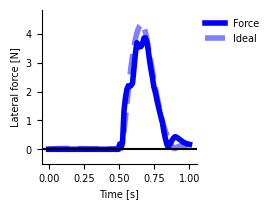

In [87]:
# endpoint_load = np.zeros((8,100))
# velocity = np.zeros((8,100))

# for mn in range(n_model):
#     model_name = 'model{:02d}'.format(mn)
#     data = get_data(folder_name,model_name,{'FF1':[8]},None,is_channel=True,n_hidden=n_hidden)

#     endpoint_load = endpoint_load + np.linalg.norm(data[0]['endpoint_load'],axis=2)/n_model
#     velocity = velocity + np.linalg.norm(data[0]['vel'],axis=2)/n_model


data = get_data(folder_name,'model01',phases,ff_coef,is_channel=True,n_hidden=n_hidden)

#endpoint_load = np.linalg.norm(data[1]['endpoint_load'],axis=2)
endpoint_load = np.linalg.norm(data[1]['endpoint_load'],axis=2)
velocity = np.linalg.norm(data[1]['vel'],axis=2)

fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(2,2)) # (2,2)
ax = [ax]


target = 0
plot.plot_force(ax,endpoint_load[target,:][None,:],velocity[target,:][None,:],lw=4)
#plot.plot_force(ax,endpoint_load.mean(axis=0,keepdims=True),velocity.mean(axis=0,keepdims=True))


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

plt.xlabel('Time [s]', fontsize = fontsize_label)
plt.ylabel('Lateral force [N]', fontsize = fontsize_label)
plt.legend(title = '',frameon = False, bbox_to_anchor= (1,1), fontsize=fontsize_legend)
ax[0].xaxis.set_tick_params(labelsize=fontsize_tick)
ax[0].yaxis.set_tick_params(labelsize=fontsize_tick)

#ax[0].set_ylim([0,20])

#fg.savefig(os.path.join(save_fig,'lat_force.pdf'),dpi=300,bbox_inches='tight')

# look into the growing-up phase

In [14]:
data_g = get_data(folder_name,'model01',{'growing_up':[0]},[0],n_hidden=n_hidden,condition='train',batch_size=32) 

xy=data_g[0]['xy']
target_xy=data_g[0]['tg']

#xy=data[0]['xy']
#target_xy=data[0]['tg']

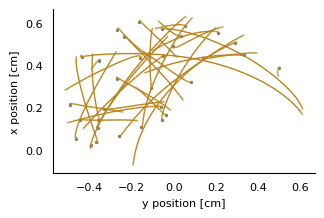

In [15]:
s=2
fig,ax = plt.subplots(1,1,figsize=(4,4))

import motornet as mn

target_x = target_xy[:, -1, 0]
target_y = target_xy[:, -1, 1]

n_reach = target_xy.shape[0]


colors = [[184/255, 130/255, 23/255, 1]]  # Single color: red
cmap = ListedColormap(colors,'regions',N=1)


#ax.set_ylim([0.3, 0.65])
#ax.set_xlim([-0.3, 0.])

plotor = mn.plotor.plot_pos_over_time
plotor(axis=ax, cart_results=xy,cmap=cmap)

angle_set = np.deg2rad(np.arange(0, 360, 45))  # 8 directions
#angle_set = np.deg2rad(np.array([0,45,60,75,90,105,120,135,180,225,315]))
color_list = [plt.cm.brg(cond / (2 * np.pi)) for cond in angle_set]
color = np.array([0.5,0.5,0.5]) 

for i in range(n_reach):
    ax.scatter(target_x[i], target_y[i],color=color,s=s) # color_list[i]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

#ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.tick_params(left = False,bottom = False) 
ax.set_xlabel('y position [cm]', fontsize = fontsize_label)
ax.set_ylabel('x position [cm]', fontsize = fontsize_label)

ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)


# Get all axes in the figure
all_axes = fig.get_axes()

# Identify and remove the colorbar axes
# (assuming the colorbar axes is the last one in the list)
colorbar_ax = all_axes[-1]  # Assuming the colorbar is the last axes object
colorbar_ax.remove()

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(save_fig,'random_reach.pdf'),dpi=300,bbox_inches='tight')

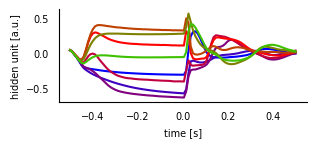

In [84]:
#fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(3,2))
#ax = plot.plot_activation(ax, hidden,muscle)
angle_set = np.deg2rad(np.arange(0, 360, 45))  # 8 directions
#angle_set = np.deg2rad(np.array([0,45,60,75,90,105,120,135,180,225,315]))
color_list = [plt.cm.brg(cond / (2 * np.pi)) for cond in angle_set]

# [53,72,92]

i=72
fg, ax = plt.subplots(nrows=1,ncols=1,figsize=(3.2,1.2))

hidden = np.array(data[0]['all_hidden'][:,:,i])



dt = 0.01
x = np.linspace(0, np.shape(hidden)[1]*dt, np.shape(hidden)[1]) - 0.5

#ax.set_title(f'neuron {i}')

for i in range(hidden.shape[0]):
    ax.plot(x,hidden[i,:],color=color_list[i])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(left = False,bottom = False) 
ax.set_xlabel('time [s]', fontsize = fontsize_label)
ax.set_ylabel('hidden unit [a.u.]', fontsize = fontsize_label)
ax.xaxis.set_tick_params(labelsize=fontsize_tick)
ax.yaxis.set_tick_params(labelsize=fontsize_tick)

fg.savefig(os.path.join(save_fig,'neuron_72.pdf'),dpi=300,bbox_inches='tight')